In [1]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np


simplefilter('ignore')

sns.set_style('whitegrid')
plt.rc(
    'figure',
    autolayout = True,
    figsize = (16, 9),
    dpi = 300,
)

In [2]:
data_dir = Path('./data')
tunnel = pd.read_csv(data_dir / 'tunnel.csv',
                     index_col = 'Day',
                     parse_dates = ['Day'])
tunnel.index = tunnel.index.to_period("D")
tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


In [3]:
moving_average = tunnel.rolling(
    window = 365,
    center = True,
    min_periods = 183,
).mean()

<AxesSubplot:xlabel='Day'>

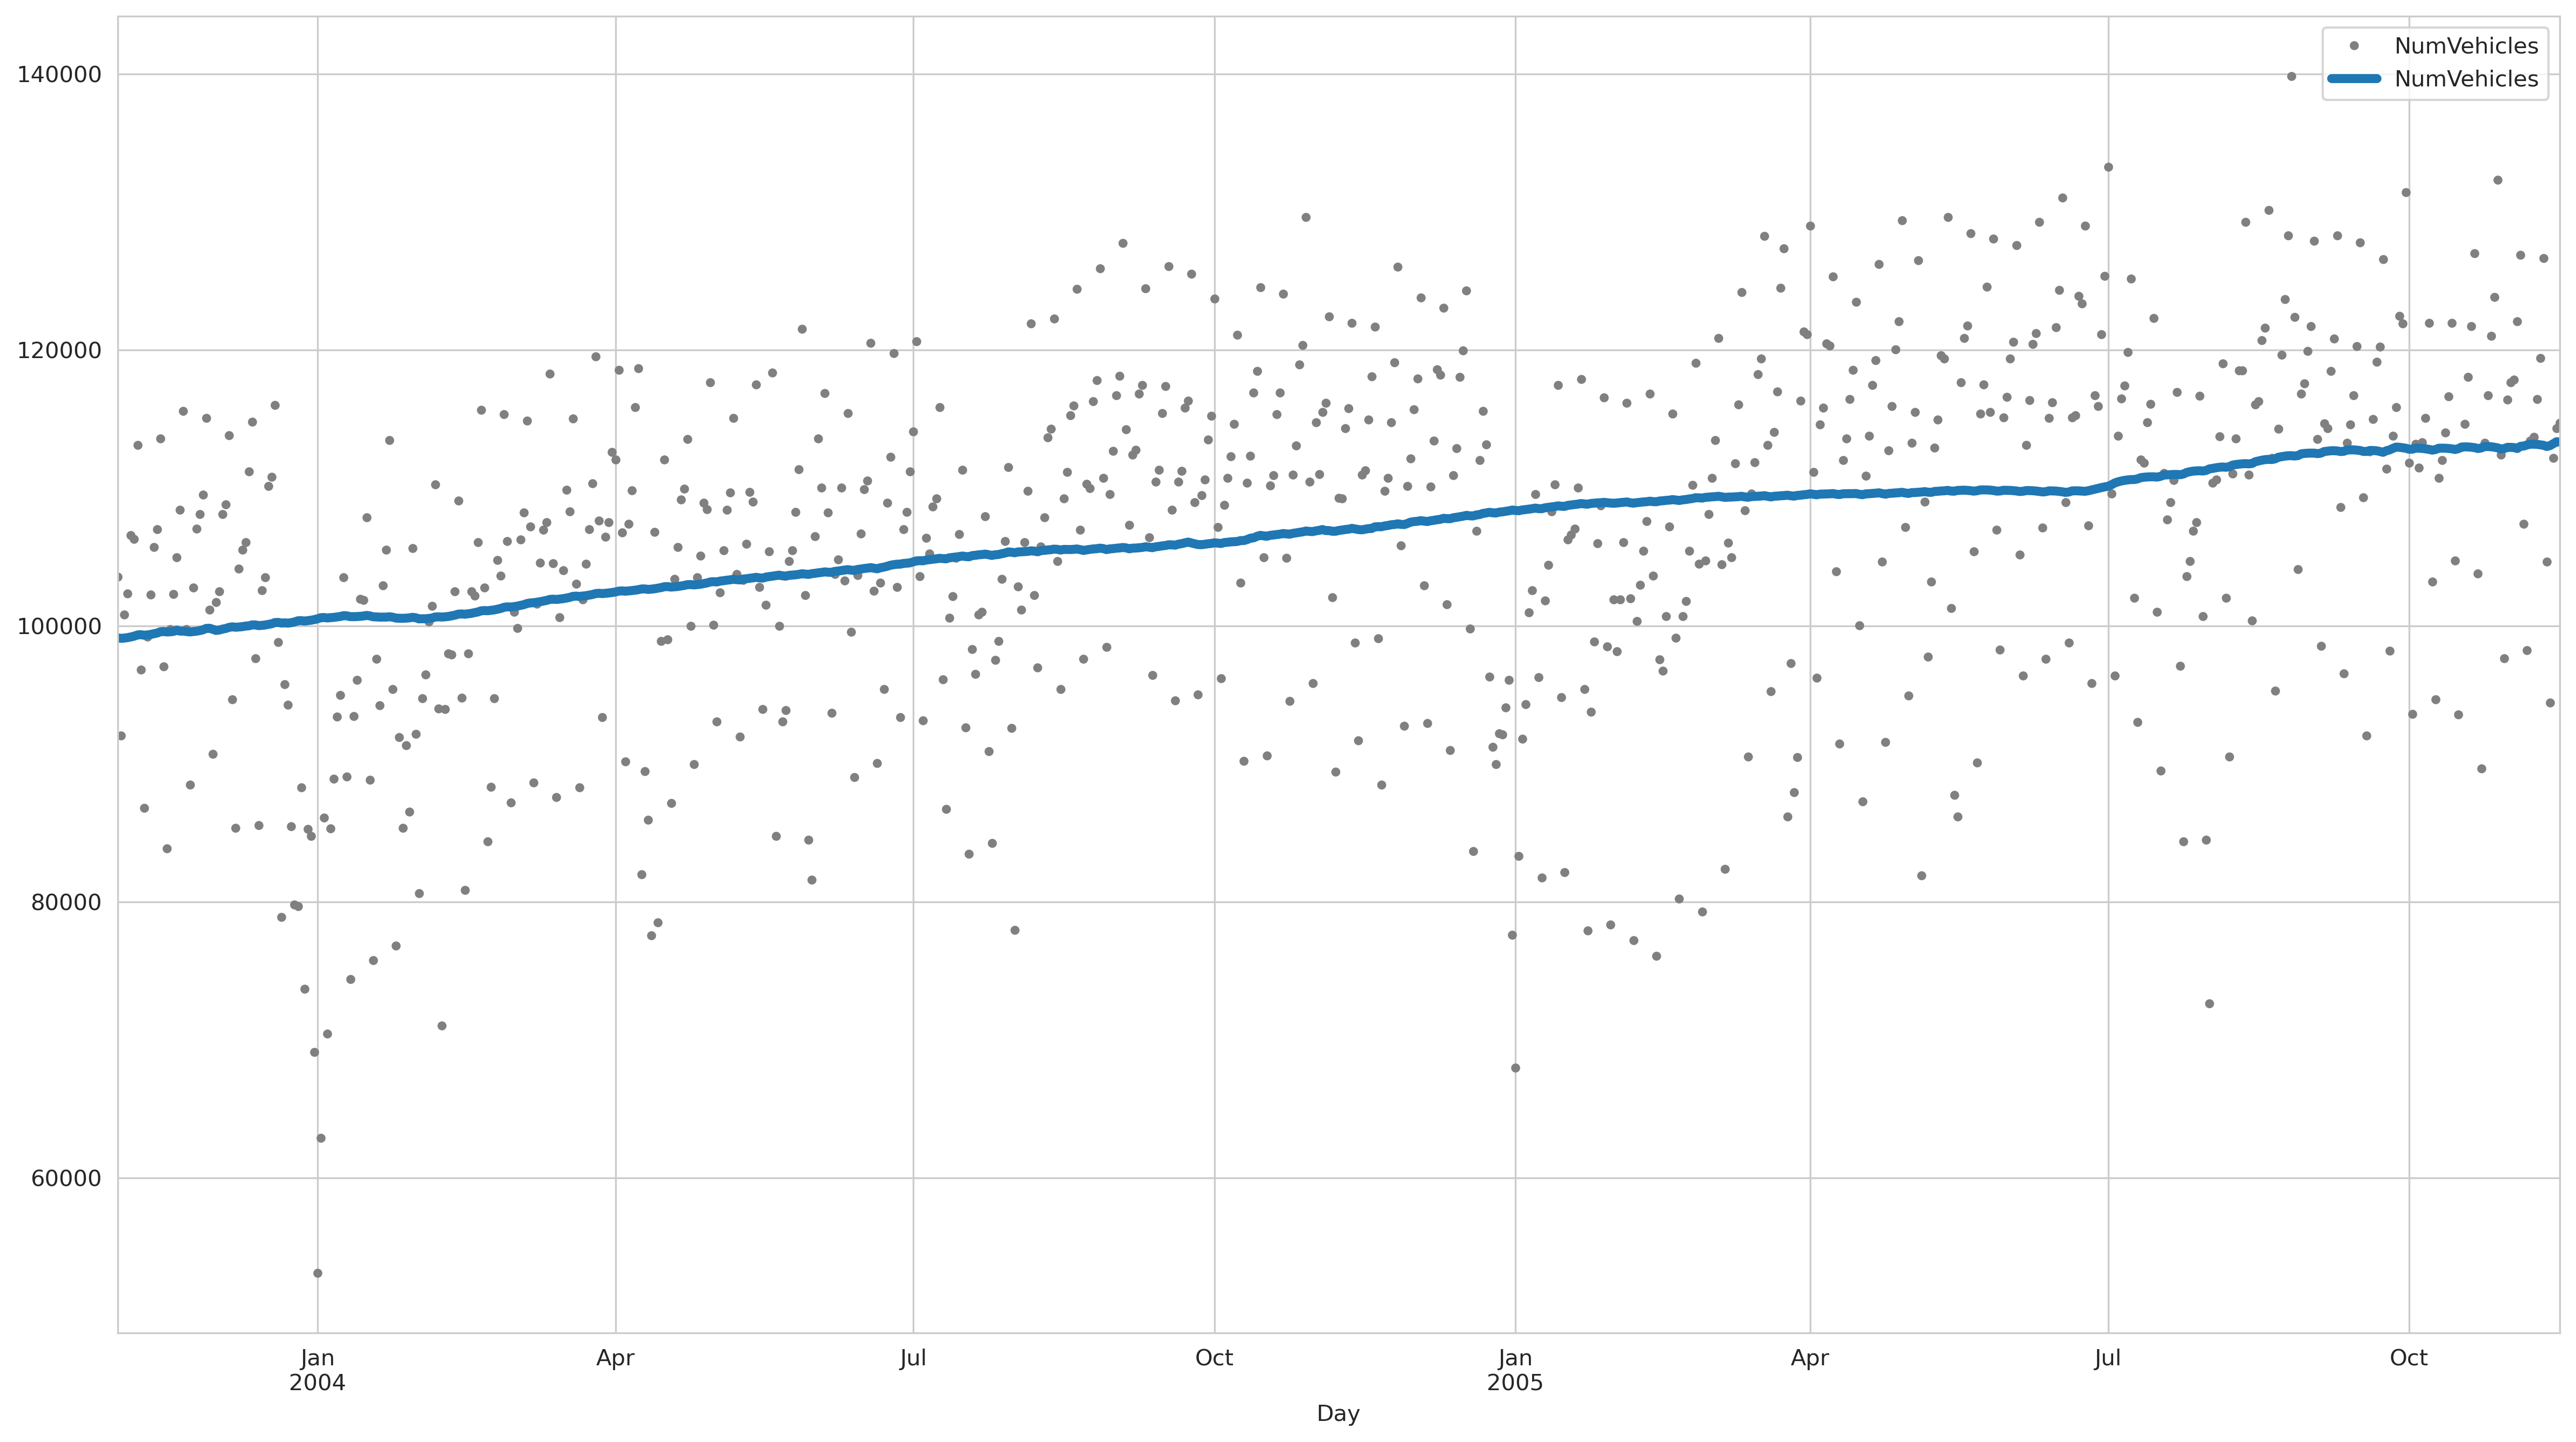

In [4]:
ax = tunnel.plot(style = '.', color = '0.5',)
moving_average.plot(
    ax = ax, linewidth = 4,
)

In [5]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index = tunnel.index,
    constant = True,
    order = 1,
    drop = True,
)

X = dp.in_sample()

X.head()

,const,trend
Day,,
2003-11-01,1.0,1.0
2003-11-02,1.0,2.0
2003-11-03,1.0,3.0
2003-11-04,1.0,4.0
2003-11-05,1.0,5.0


In [6]:
from sklearn.linear_model import LinearRegression

y = tunnel['NumVehicles']

model = LinearRegression(fit_intercept = False)
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index = X.index)

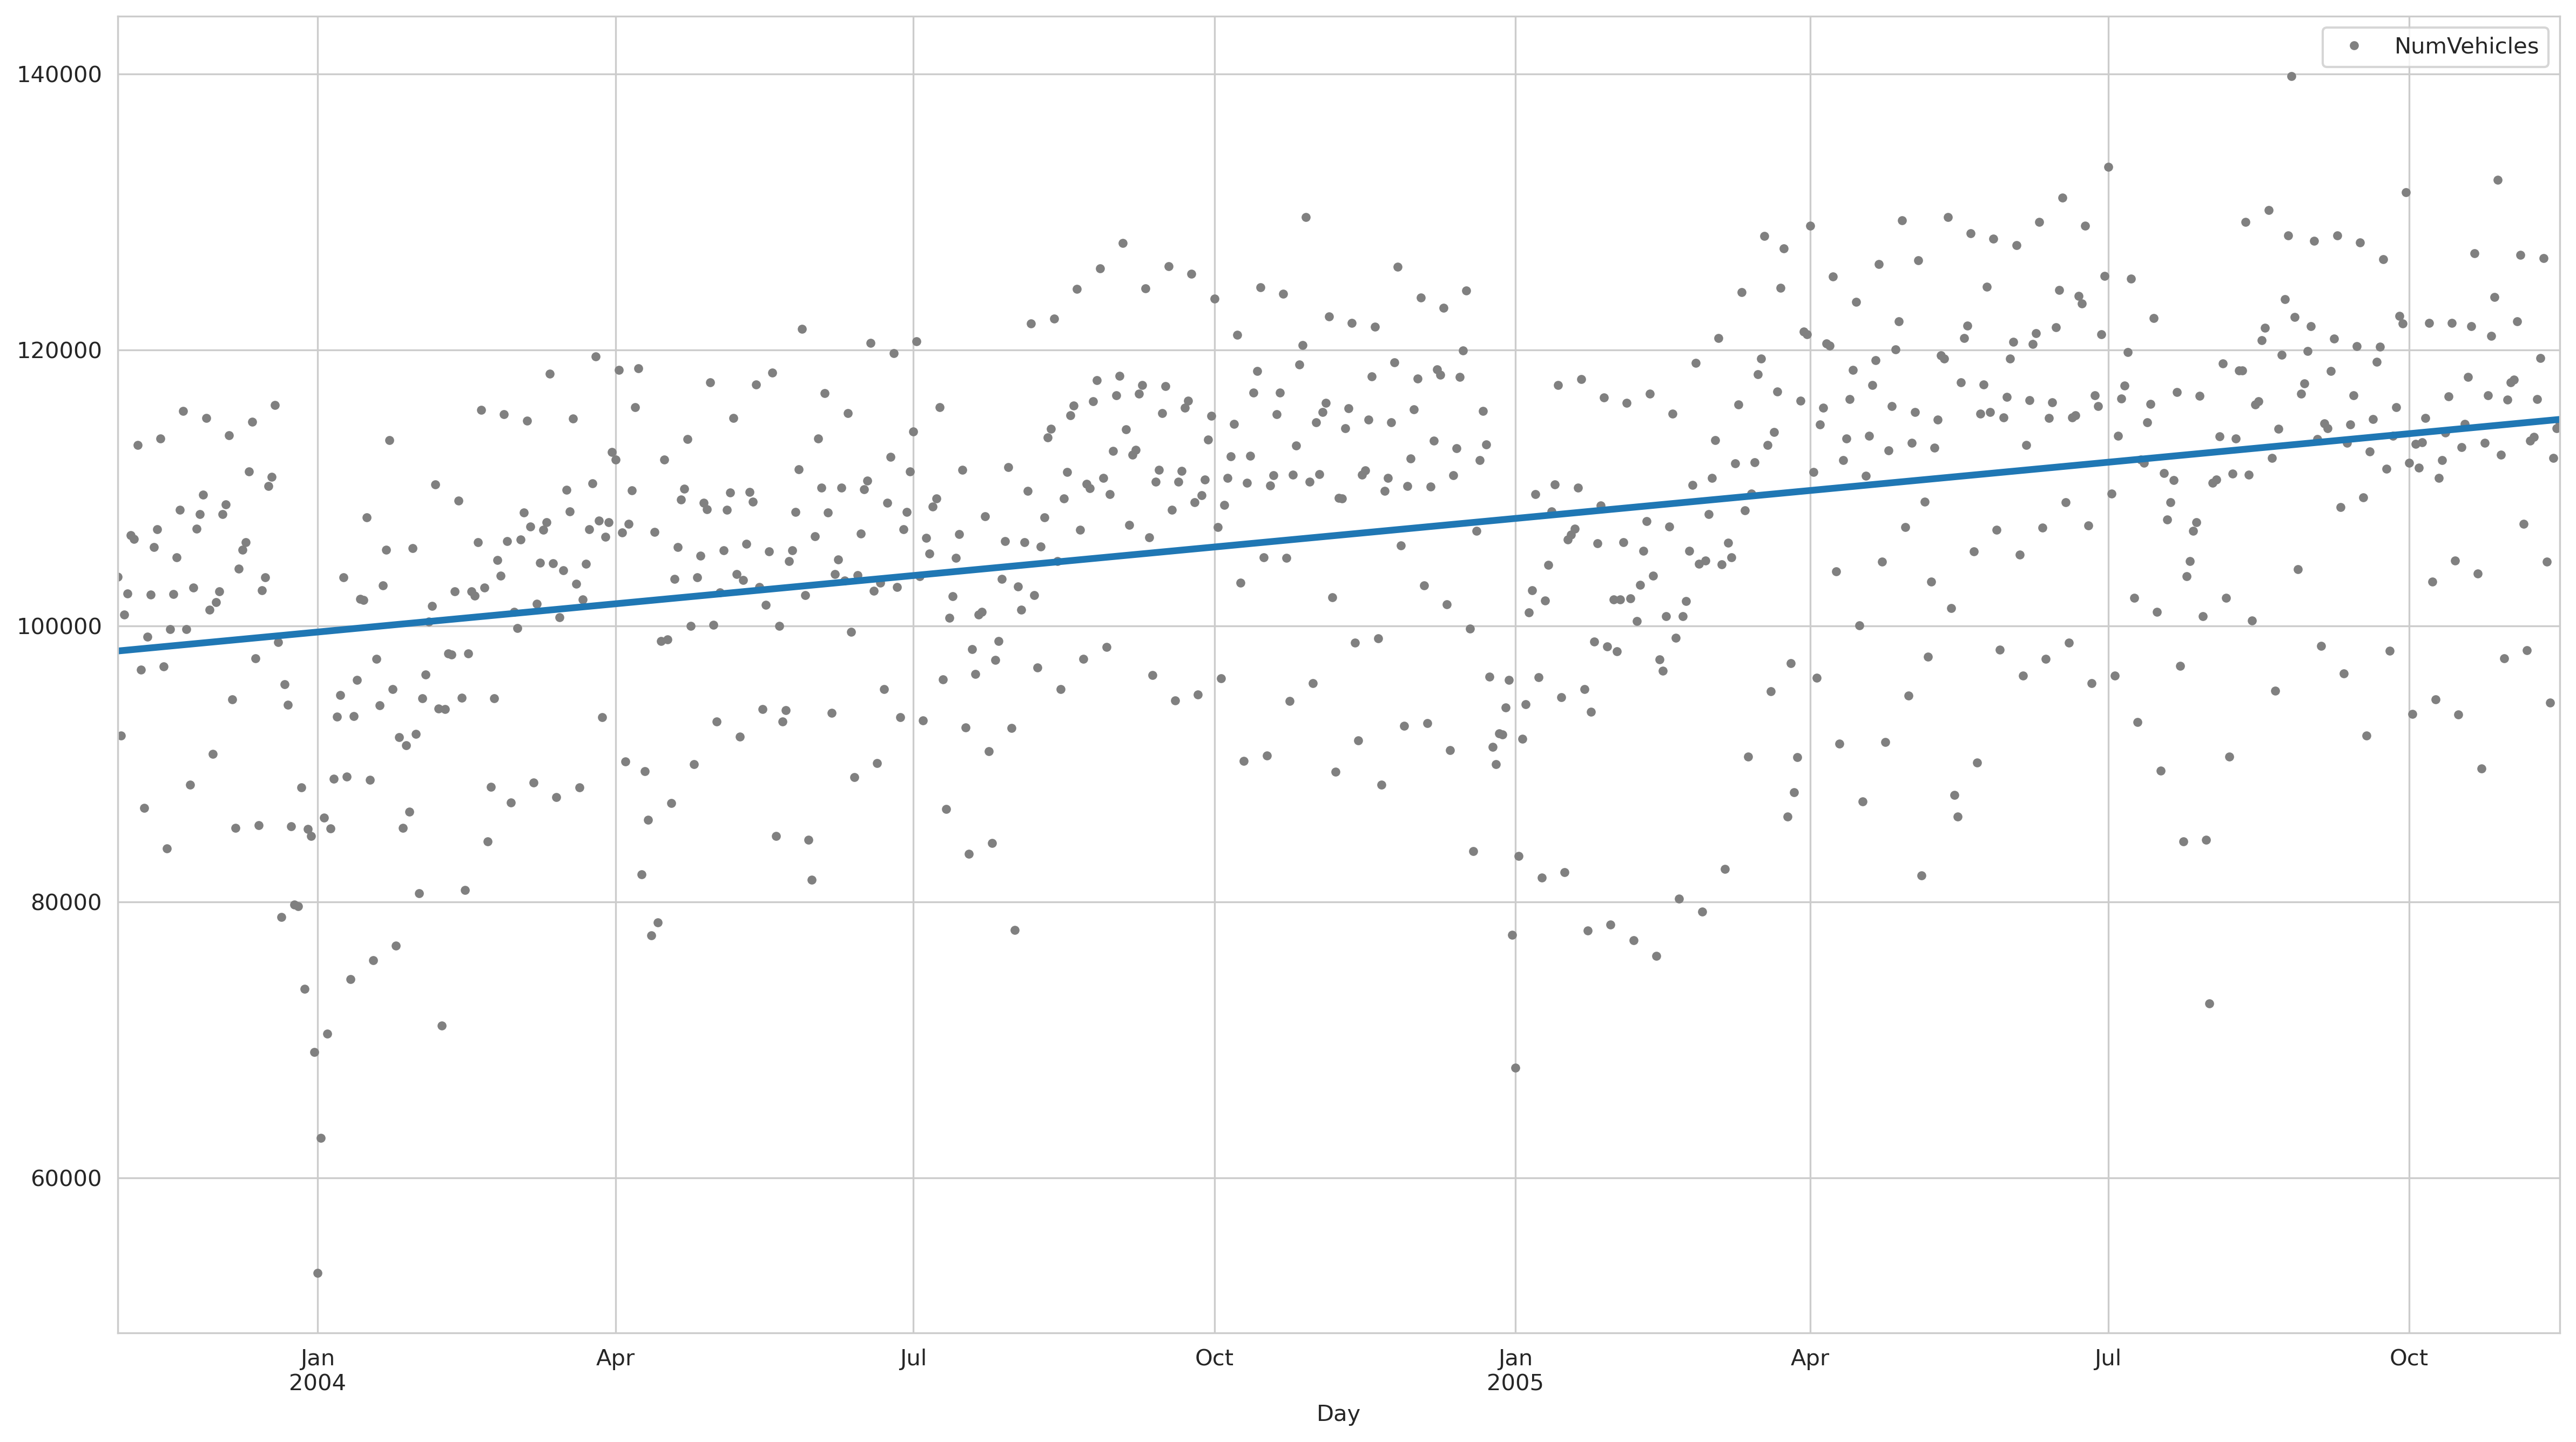

In [7]:
ax = tunnel.plot(style = '.', color = '0.5',)
_ = y_pred.plot(ax = ax, linewidth = 3,)

In [8]:
pd.concat([dp.in_sample().tail(), dp.out_of_sample(5)])

,const,trend
2005-11-12,1.0,743.0
2005-11-13,1.0,744.0
2005-11-14,1.0,745.0
2005-11-15,1.0,746.0
2005-11-16,1.0,747.0
2005-11-17,1.0,748.0
2005-11-18,1.0,749.0
2005-11-19,1.0,750.0
2005-11-20,1.0,751.0
2005-11-21,1.0,752.0


In [9]:
X = dp.out_of_sample(steps = 30)

y_fore = pd.Series(model.predict(X), index = X.index)

y_fore.head()

2005-11-17    114981.801146
2005-11-18    115004.298595
2005-11-19    115026.796045
2005-11-20    115049.293494
2005-11-21    115071.790944
Freq: D, dtype: float64

<AxesSubplot:xlabel='Day'>

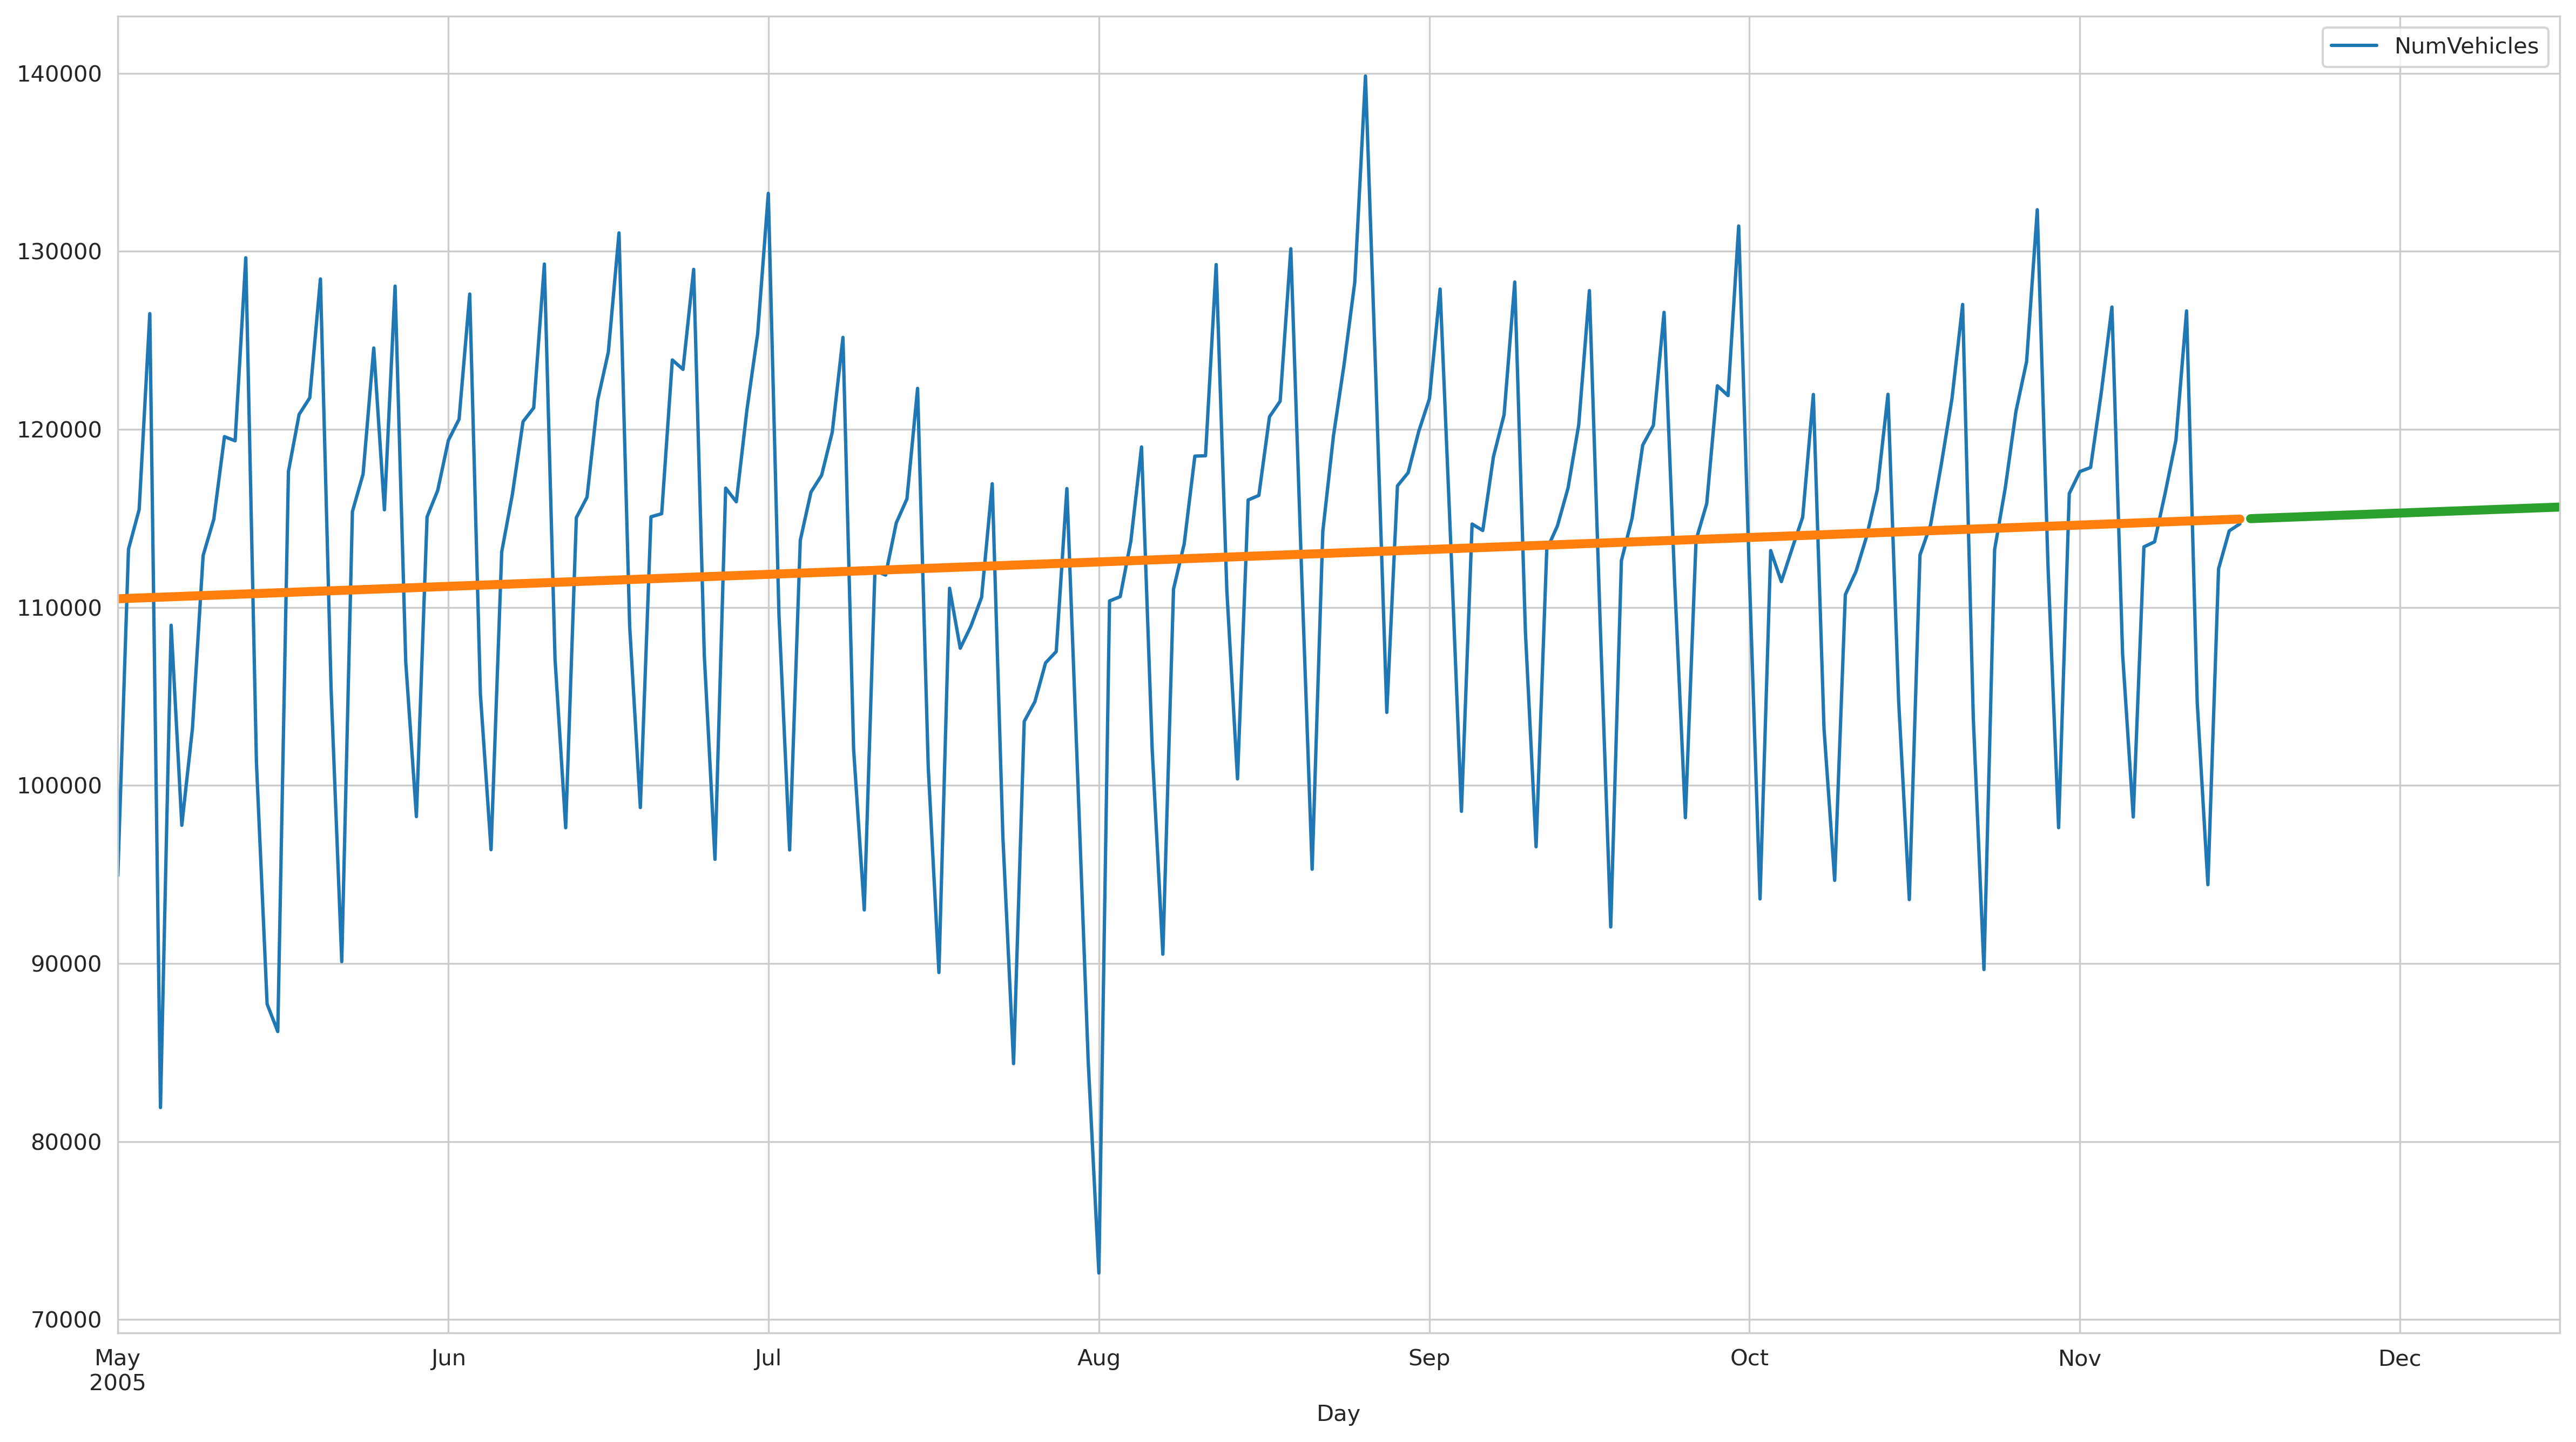

In [11]:
ax = tunnel["2005-05":].plot()
y_pred["2005-05":].plot(ax = ax, linewidth = 4, label = "Trend",)
y_fore.plot(ax = ax, linewidth = 4, label = "Trend Forecast",)